###### lib

In [48]:
import pandas as pd
import numpy as np
import PIL
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

from PIL import Image
from numpy import asarray

###### read data

In [5]:
df = pd.read_csv('art_catalog_clear.csv')

###### read images convert into numpy.ndarray

In [47]:
# list of all Images
lst_images = []

# numpy array
lst_width = []
lst_height = []

# asarray() class is used to convert
# PIL images into NumPy arrays
i = 0
for Link in df.Link:
    
    # except 8782 idx because the url break
    if i == 8782: continue
        
    img = Image.open(Link)

    numpydata = asarray(img)
 
    # <class 'numpy.ndarray'>
    # print(type(numpydata))
    
    # list of all width and all height for analyse
    lst_width.append(numpydata[0])
    lst_height.append(numpydata[1])
    
    # list of all images
    lst_images.append(numpydata)
    
    i += 1

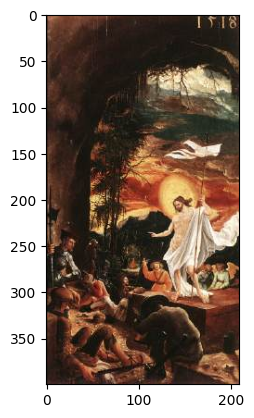

In [57]:
img_plot = plt.imshow(lst_images[54])
plt.show()

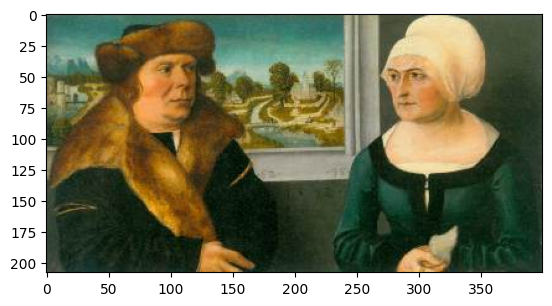

In [58]:
img_plot = plt.imshow(lst_images[65])
plt.show()

# Interpolation bilinéaire

L'interpolation bilinéaire est une technique utilisée pour redimensionner des images en ajoutant des pixels pour remplir les espaces vides entre les pixels existants. Elle permet de conserver la qualité de l'image originale tout en la redimensionnant.

Le principe de base de l'interpolation bilinéaire est de considérer que chaque pixel de l'image est un point dans un espace à deux dimensions, et de calculer la couleur de chaque pixel de la nouvelle image en utilisant un poids basé sur la distance de chaque pixel de l'image originale à ce pixel.

Plus précisément, pour chaque pixel de la nouvelle image, on calcule la couleur en utilisant les quatre pixels les plus proches de l'image originale, en utilisant un poids basé sur la distance entre les pixels. Les pixels les plus proches ont un poids plus élevé que les pixels plus éloignés, ce qui permet de conserver les détails de l'image originale tout en ajoutant des pixels pour remplir les espaces vides.

L'interpolation bilinéaire est généralement considérée comme une des meilleures techniques pour redimensionner les images car elle permet de conserver les détails importants tout en réduisant les artefacts visuels générés par d'autres techniques de redimensionnement.

In [72]:
folder = "data_imgg"
size = (200, 200)

for filename in os.listdir(folder):
    with Image.open(os.path.join(folder, filename)) as im:
        im = im.resize(size, Image.BILINEAR)
        
        im.save(os.path.join(folder, "bilinear_"+filename))

C:\Users\mathi\AppData\Local\Temp\ipykernel_8296\3115425890.py:9: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  im = im.resize(size, Image.BILINEAR)


###### output

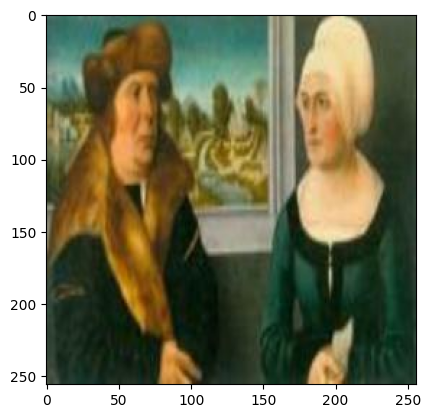

In [62]:
img1 = Image.open("data_imgg/bilinear_65.jpg")
img_plot = plt.imshow(img1)

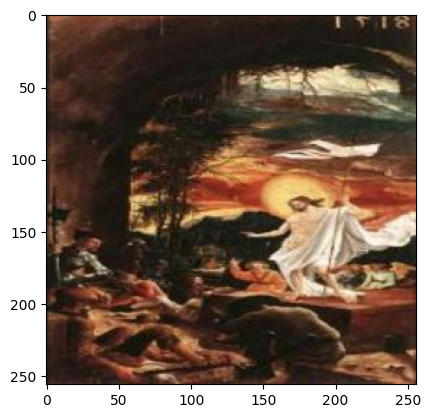

In [63]:
img1 = Image.open("data_imgg/bilinear_54.jpg")
img_plot = plt.imshow(img1)

# Interpolation bicubique

L'interpolation cubique est une méthode utilisée pour redimensionner des images en utilisant des fonctions cubiques pour déterminer les couleurs des pixels de la nouvelle image. Il est généralement considéré comme une méthode d'interpolation plus précise que l'interpolation bilinéaire, car il utilise des informations supplémentaires sur les pixels voisins pour déterminer les couleurs des pixels de la nouvelle image.

L'interpolation cubique est basée sur le calcul de la valeur des pixels en utilisant des polynômes cubiques pour approximer les valeurs des pixels voisins. Il existe plusieurs types d'interpolation cubique, tels que l'interpolation cubique de Catmull-Rom, l'interpolation cubique de B-Spline, l'interpolation cubique de Mitchell-Netravali, etc.

L'interpolation cubique est généralement utilisée pour redimensionner les images avec une résolution élevée, car elle permet de conserver les détails de l'image originale tout en ajoutant des pixels pour remplir les espaces vides. Cependant, elle est également plus complexe que l'interpolation bilinéaire, et nécessite plus de calculs pour être effectuée.

En résumé, l'interpolation cubique est une méthode d'interpolation plus précise qui utilise des informations supplémentaires sur les pixels voisins pour déterminer les couleurs des pixels de la nouvelle image, elle est souvent utilisée pour redimensionner des images haute résolution pour conserver les détails de l'image originale.

In [85]:
folder = "data_imgg"
size = (512, 512)

for filename in os.listdir(folder):
    with Image.open(os.path.join(folder, filename)) as im:
        im = im.resize(size, resample=Image.BICUBIC)
        im.save(os.path.join(folder, "bicubic_" + filename))

C:\Users\mathi\AppData\Local\Temp\ipykernel_8296\3828569172.py:6: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  im = im.resize(size, resample=Image.BICUBIC)


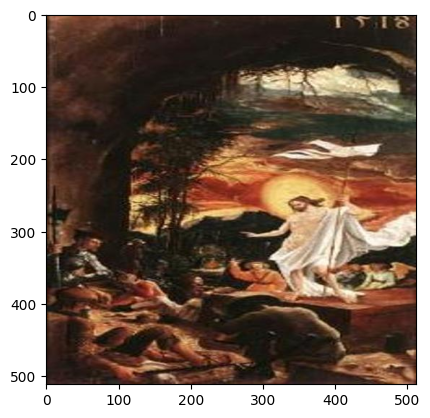

In [86]:
img = Image.open("data_imgg/bicubic_54.jpg")
img_plot = plt.imshow(img)

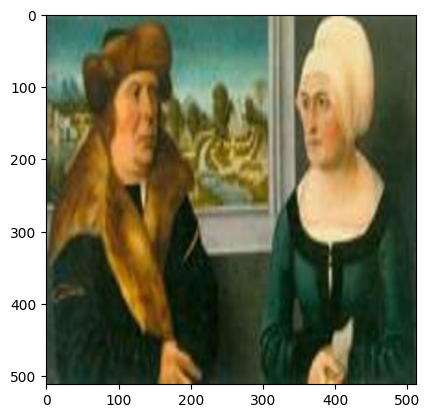

In [87]:
img1 = Image.open("data_imgg/bicubic_65.jpg")
img_plot = plt.imshow(img1)

# Pipeline + Normalization

In [92]:
folder = "data_img"
size = (512, 512)
i = 0
for filename in os.listdir(folder):
    with Image.open(os.path.join(folder, filename)) as im:
        
        if i == 10:break
        print(filename)
        
        im = im.resize(size, resample=Image.BICUBIC)
        
        im_np = np.array(im)
        
        im_np = np.interp(im_np, (im_np.min(), im_np.max()), (0, 1))
        
        im = Image.fromarray((im_np * 255).astype(np.uint8))
        
        im.save(os.path.join(folder, "data_preprocess/" + filename))
        
        i += 1

C:\Users\mathi\AppData\Local\Temp\ipykernel_8296\89483048.py:6: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  im = im.resize(size, resample=Image.BICUBIC)


PermissionError: [Errno 13] Permission denied: 'data_img\\data_preprocess'

###### output

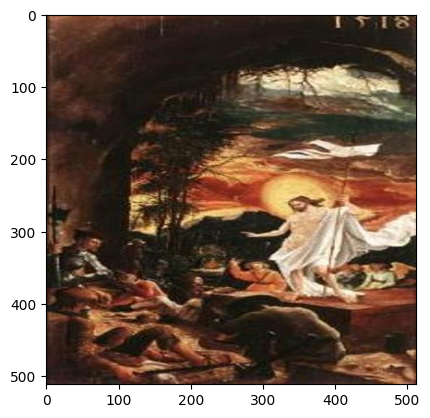

In [90]:
img = Image.open("data_imgg/bicubic_normalize_54.jpg")
img_plot = plt.imshow(img)

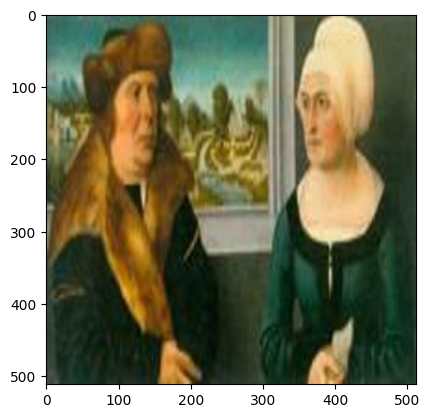

In [89]:
img1 = Image.open("data_imgg/bicubic_normalize_65.jpg")
img_plot = plt.imshow(img1)

In [93]:
folder = "data_img/data_preprocess/"

# list of all Images
lst_images_preprocess = []

# numpy array
lst_width_preprocess = []
lst_height_preprocess = []

i = 0
for filename in os.listdir(folder):
    with Image.open(os.path.join(folder, filename)) as im:
        
        numpydata = asarray(img)
        
        # list of all width and all height for analyse
        lst_width_preprocess.append(numpydata[0])
        lst_height_preprocess.append(numpydata[1])
    
        # list of all images
        lst_images_preprocess.append(numpydata)
    
        i += 1
       

In [97]:
len(lst_images_preprocess)

32437

###### Avant pre process

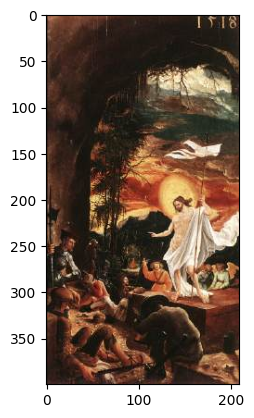

In [96]:
img_plot = plt.imshow(images[54])
plt.show()

###### Apres preprocess

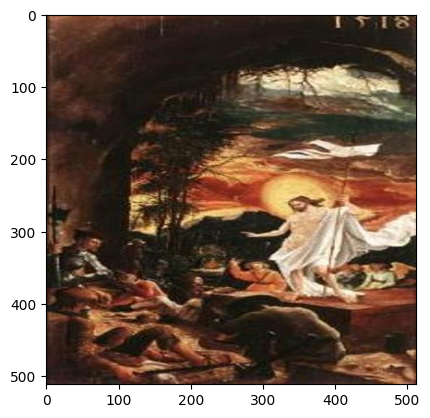

In [95]:
img_plot = plt.imshow(lst_images_preprocess[54])
plt.show()